<a href="https://colab.research.google.com/github/SiKritN/ML_assignment2/blob/main/DADS6003_ML_Assignment2_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4560    0  4560    0     0  14947      0 --:--:-- --:--:-- --:--:-- 15000
100  517k  100  517k    0     0   741k      0 --:--:-- --:--:-- --:--:-- 3172k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4552    0  4552    0     0  18852      0 --:--:-- --:--:-- --:--:-- 18887
100  392k  100  392k    0     0   741k      0 --:--:-- --:--:-- --:--:--  741k


In [2]:
# Data Manipulation
import numpy as np
import pandas as pd
import yfinance as yf

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


Step1) Import data

In [3]:
ais = yf.Ticker("advanc.bk")
interval = "1h"
start = "2023-1-1"
end = "2023-12-31"
ais_price_df = ais.history(interval="1h", start = start, end = end)

In [4]:
ais_price_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 10:00:00+07:00,196.0,196.5,195.5,195.5,0,0.0,0.0
2023-01-03 11:00:00+07:00,195.5,196.0,195.0,195.0,592773,0.0,0.0
2023-01-03 12:00:00+07:00,195.0,196.0,195.0,195.5,175359,0.0,0.0
2023-01-03 14:00:00+07:00,195.5,196.0,195.5,196.0,153612,0.0,0.0
2023-01-03 15:00:00+07:00,195.5,196.0,195.0,195.5,414051,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-28 11:00:00+07:00,218.0,218.0,217.0,217.0,160411,0.0,0.0
2023-12-28 12:00:00+07:00,217.0,218.0,217.0,218.0,526400,0.0,0.0
2023-12-28 14:00:00+07:00,217.0,218.0,217.0,218.0,214740,0.0,0.0


In [5]:
df = ais_price_df.copy()


In [6]:
df = df.iloc[:, :4]
df.head()

,Open,High,Low,Close
Datetime,,,,
2023-01-03 10:00:00+07:00,196.0,196.5,195.5,195.5
2023-01-03 11:00:00+07:00,195.5,196.0,195.0,195.0
2023-01-03 12:00:00+07:00,195.0,196.0,195.0,195.5
2023-01-03 14:00:00+07:00,195.5,196.0,195.5,196.0
2023-01-03 15:00:00+07:00,195.5,196.0,195.0,195.5


Step 2: Define Predictor/Independent Variables

In [7]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X_df = df.iloc[:,:9]
X = X_df.copy()
X.head(20)

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-06 10:00:00+07:00,201.0,202.0,200.0,202.0,199.35,0.809951,73.594066,1.0,-1.0
2023-01-06 11:00:00+07:00,202.0,202.0,201.0,201.0,199.90,0.748403,65.186121,0.0,1.0
2023-01-06 12:00:00+07:00,201.0,202.0,201.0,202.0,200.45,0.724443,69.107651,0.0,-1.0
2023-01-06 14:00:00+07:00,201.0,202.0,201.0,202.0,200.95,0.717571,69.107651,-1.0,0.0
2023-01-06 15:00:00+07:00,201.0,202.0,201.0,202.0,201.20,0.665737,69.107651,-1.0,0.0
2023-01-06 16:00:00+07:00,201.0,202.0,200.0,202.0,201.30,0.757473,69.107651,-1.0,0.0
2023-01-09 10:00:00+07:00,202.0,203.0,201.0,202.0,201.40,0.832489,69.107651,0.0,1.0
2023-01-09 11:00:00+07:00,202.0,202.0,201.0,202.0,201.60,0.752949,69.107651,0.0,0.0
2023-01-09 12:00:00+07:00,202.0,202.0,201.0,202.0,201.70,0.748374,69.107651,0.0,0.0


Step 3: Define Target/Dependent **Variable**

In [8]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

Step 4: Split The Dataset

In [9]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

Step 5: Instantiate The Logistic Regression in Python

In [10]:
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)

Step 6: Examine The **Coefficients**

In [11]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.06479518703964478]
1,High,[0.6667756332461804]
2,Low,[0.6162749302463242]
3,Close,[-1.1397009801071394]
4,S_10,[-0.08188605538389064]
5,Corr,[-0.16989435869154143]
6,RSI,[-0.005137415217308484]
7,Open-Close,[0.1774152713582946]
8,Open-Open,[0.01167740419694147]


Step 7: Calculate Class Probabilities

In [12]:
prediction_date = '2024-12-31'
probability = model.predict_proba(X_test)
probability

array([[0.55224997, 0.44775003],
       [0.78973024, 0.21026976],
       [0.5984323 , 0.4015677 ],
       [0.82898633, 0.17101367],
       [0.74995151, 0.25004849],
       [0.82713116, 0.17286884],
       [0.64702022, 0.35297978],
       [0.89258629, 0.10741371],
       [0.86221211, 0.13778789],
       [0.84723003, 0.15276997],
       [0.7689778 , 0.2310222 ],
       [0.89578995, 0.10421005],
       [0.77294135, 0.22705865],
       [0.65699588, 0.34300412],
       [0.72556517, 0.27443483],
       [0.60444462, 0.39555538],
       [0.60631581, 0.39368419],
       [0.6062709 , 0.3937291 ],
       [0.6037674 , 0.3962326 ],
       [0.88187382, 0.11812618],
       [0.84172293, 0.15827707],
       [0.62909426, 0.37090574],
       [0.73225714, 0.26774286],
       [0.74420815, 0.25579185],
       [0.84018749, 0.15981251],
       [0.65656482, 0.34343518],
       [0.46735315, 0.53264685],
       [0.60730564, 0.39269436],
       [0.83465817, 0.16534183],
       [0.75944112, 0.24055888],
       [0.

Step 8: Predict Class Labels

```
# This is formatted as code
```



In [13]:
predicted = model.predict(X_test)
predicted

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

Step 9: Evaluate The Model

In [14]:
#Confusion matrix
#print(metrics.confusion_matrix(y_test, predicted))

In [15]:
#Classification report
#print(metrics.classification_report(y_test, predicted))

In [16]:
#model accuracy
#print(model.score(X_test,y_test))

Step 10: Create Trading Strategy Using The Model

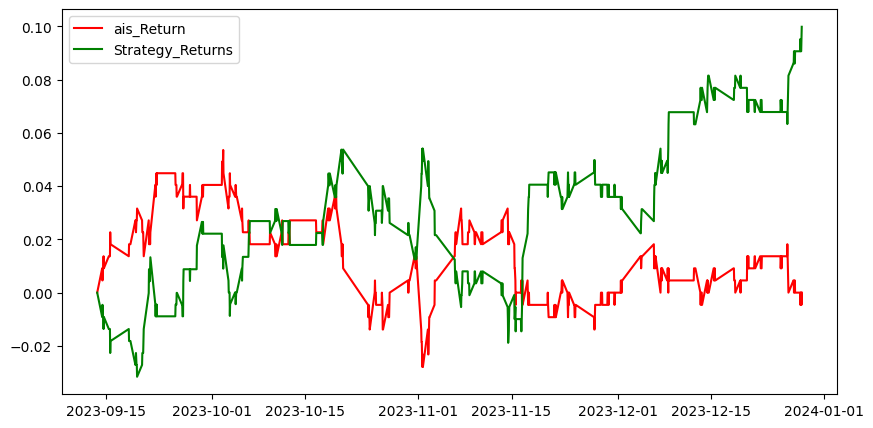

In [17]:
df['Predicted_Signal'] = model.predict(X)
df['ais_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_ais_returns = np.cumsum(df[split:]['ais_returns'])

df['Startegy_returns'] = df['ais_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_ais_returns, color='r',label = 'ais_Return')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy_Returns')
plt.legend()
plt.show()

Add Feature


In [18]:
scb = yf.Ticker("scb.bk")
interval = "1h"
start = "2023-1-1"
end = "2023-12-31"
scb_price_df = scb.history(interval="1h", start = start, end = end)

df2 = scb_price_df["Close"]
df2 = pd.DataFrame(df2)
df2

,Close
Datetime,
2023-01-03 10:00:00+07:00,107.0
2023-01-03 11:00:00+07:00,107.0
2023-01-03 12:00:00+07:00,107.0
2023-01-03 14:00:00+07:00,107.0
2023-01-03 15:00:00+07:00,107.5
...,...
2023-12-28 11:00:00+07:00,105.5
2023-12-28 12:00:00+07:00,106.0
2023-12-28 14:00:00+07:00,106.0


In [19]:
merge_df = pd.merge(df.iloc[:,:9], df2, on = "Datetime", how = "inner")
merge_df.head()

,Open,High,Low,Close_x,S_10,Corr,RSI,Open-Close,Open-Open,Close_y
Datetime,,,,,,,,,,
2023-01-06 10:00:00+07:00,201.0,202.0,200.0,202.0,199.35,0.809951,73.594066,1.0,-1.0,111.5
2023-01-06 11:00:00+07:00,202.0,202.0,201.0,201.0,199.90,0.748403,65.186121,0.0,1.0,111.0
2023-01-06 12:00:00+07:00,201.0,202.0,201.0,202.0,200.45,0.724443,69.107651,0.0,-1.0,111.5
2023-01-06 14:00:00+07:00,201.0,202.0,201.0,202.0,200.95,0.717571,69.107651,-1.0,0.0,111.0
2023-01-06 15:00:00+07:00,201.0,202.0,201.0,202.0,201.20,0.665737,69.107651,-1.0,0.0,112.0


In [20]:
merge_df.rename(columns={'Close_x': 'Close_ais'}, inplace=True)
merge_df.rename(columns={'Close_y': 'Close_scb'}, inplace=True)


In [21]:
Xb_df = merge_df.iloc[:,:10]

Xb = Xb_df.copy()

Xb.head()

,Open,High,Low,Close_ais,S_10,Corr,RSI,Open-Close,Open-Open,Close_scb
Datetime,,,,,,,,,,
2023-01-06 10:00:00+07:00,201.0,202.0,200.0,202.0,199.35,0.809951,73.594066,1.0,-1.0,111.5
2023-01-06 11:00:00+07:00,202.0,202.0,201.0,201.0,199.90,0.748403,65.186121,0.0,1.0,111.0
2023-01-06 12:00:00+07:00,201.0,202.0,201.0,202.0,200.45,0.724443,69.107651,0.0,-1.0,111.5
2023-01-06 14:00:00+07:00,201.0,202.0,201.0,202.0,200.95,0.717571,69.107651,-1.0,0.0,111.0
2023-01-06 15:00:00+07:00,201.0,202.0,201.0,202.0,201.20,0.665737,69.107651,-1.0,0.0,112.0


In [22]:
yb = np.where(merge_df['Close_ais'].shift(-1) > merge_df['Close_ais'],1,-1)
yb

array([-1,  1, -1, ..., -1,  1, -1])

In [23]:
splitb = int(0.7*len(merge_df))
Xb_train, Xb_test, yb_train, yb_test = Xb[:splitb], Xb[splitb:], yb[:splitb], yb[splitb:]

In [24]:
modelb = LogisticRegression(max_iter=1000)
modelb = modelb.fit(Xb_train,yb_train)

In [25]:
pd.DataFrame(zip(Xb_df.columns, np.transpose(modelb.coef_)))

,0,1
0,Open,[-0.0644581036842485]
1,High,[0.666544163020797]
2,Low,[0.6159310348222029]
3,Close_ais,[-1.1390022717965782]
4,S_10,[-0.08196038100241991]
5,Corr,[-0.16941947674734018]
6,RSI,[-0.005191305834755497]
7,Open-Close,[0.17724034453491985]
8,Open-Open,[0.011710804560077125]
9,Close_scb,[-0.0007897644878504287]


In [26]:
predictionb_date = '2024-12-22'
probabilityb = modelb.predict_proba(Xb_test)
probabilityb

array([[0.55325251, 0.44674749],
       [0.79043994, 0.20956006],
       [0.59937464, 0.40062536],
       [0.82952406, 0.17047594],
       [0.75059382, 0.24940618],
       [0.82763368, 0.17236632],
       [0.64782388, 0.35217612],
       [0.89277052, 0.10722948],
       [0.86253884, 0.13746116],
       [0.84756268, 0.15243732],
       [0.76952221, 0.23047779],
       [0.89599065, 0.10400935],
       [0.77326541, 0.22673459],
       [0.65734997, 0.34265003],
       [0.72580057, 0.27419943],
       [0.60481262, 0.39518738],
       [0.60661397, 0.39338603],
       [0.6064822 , 0.3935178 ],
       [0.60399342, 0.39600658],
       [0.88185159, 0.11814841],
       [0.84167122, 0.15832878],
       [0.62891289, 0.37108711],
       [0.73214177, 0.26785823],
       [0.74395046, 0.25604954],
       [0.84005292, 0.15994708],
       [0.65625105, 0.34374895],
       [0.46715301, 0.53284699],
       [0.60718552, 0.39281448],
       [0.83448836, 0.16551164],
       [0.75909125, 0.24090875],
       [0.

In [27]:
predictedb = modelb.predict(Xb_test)
predictedb

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [28]:
print(metrics.confusion_matrix(yb_test, predictedb))

[[283  24]
 [106  20]]


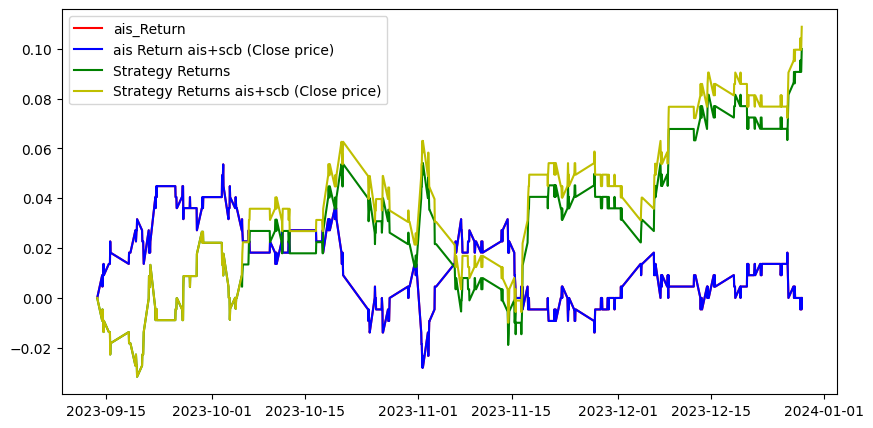

In [29]:
plt.figure(figsize=(10,5))

plt.plot(Cumulative_ais_returns, color='r',label = 'ais_Return')  ## สีน้ำเงินกับสีแดงทับกัน

#ผลตอบแทน actual ของais + scb
merge_df['Predicted_Signalb'] = modelb.predict(Xb)
merge_df['ais_scb'] = np.log(merge_df['Close_ais']/merge_df['Close_ais'].shift(1))
Cumulative_ais_scb_returns = np.cumsum(merge_df[splitb:]['ais_scb'])
plt.plot(Cumulative_ais_scb_returns, color='b',label = 'ais Return ais+scb (Close price)')

#ผลตอบแทนของตาม model
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')


#ผลตอบแทนของตาม model ais+scb
merge_df['Strategy_returnsb'] = merge_df['ais_scb']* merge_df['Predicted_Signalb'].shift(1)
Cumulative_Strategy_returnsb = np.cumsum(merge_df[splitb:]['Strategy_returnsb'])
plt.plot(Cumulative_Strategy_returnsb, color='y', label = 'Strategy Returns ais+scb (Close price)')


plt.legend()
plt.show()